In [1]:
# Pip install method (recommended)

%pip install ultralytics==8.0.196
%pip install roboflow --quiet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython import display
display.clear_output()

import ultralytics

ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 5937MiB)
Setup complete ✅ (24 CPUs, 62.6 GB RAM, 394.5/960.2 GB disk)


In [3]:
dataLoc = '/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/dataset/data.yaml'

In [ ]:
model = YOLO("yolov8n.pt")
model.train(data=dataLoc, epochs=2, imgsz=800, device="cpu", batch=16, task="detect", plots=True, mode="train", amp=False)


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (12th Gen Intel Core(TM) i9-12900K)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/dataset/data.yaml, epochs=2, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

KeyboardInterrupt: 

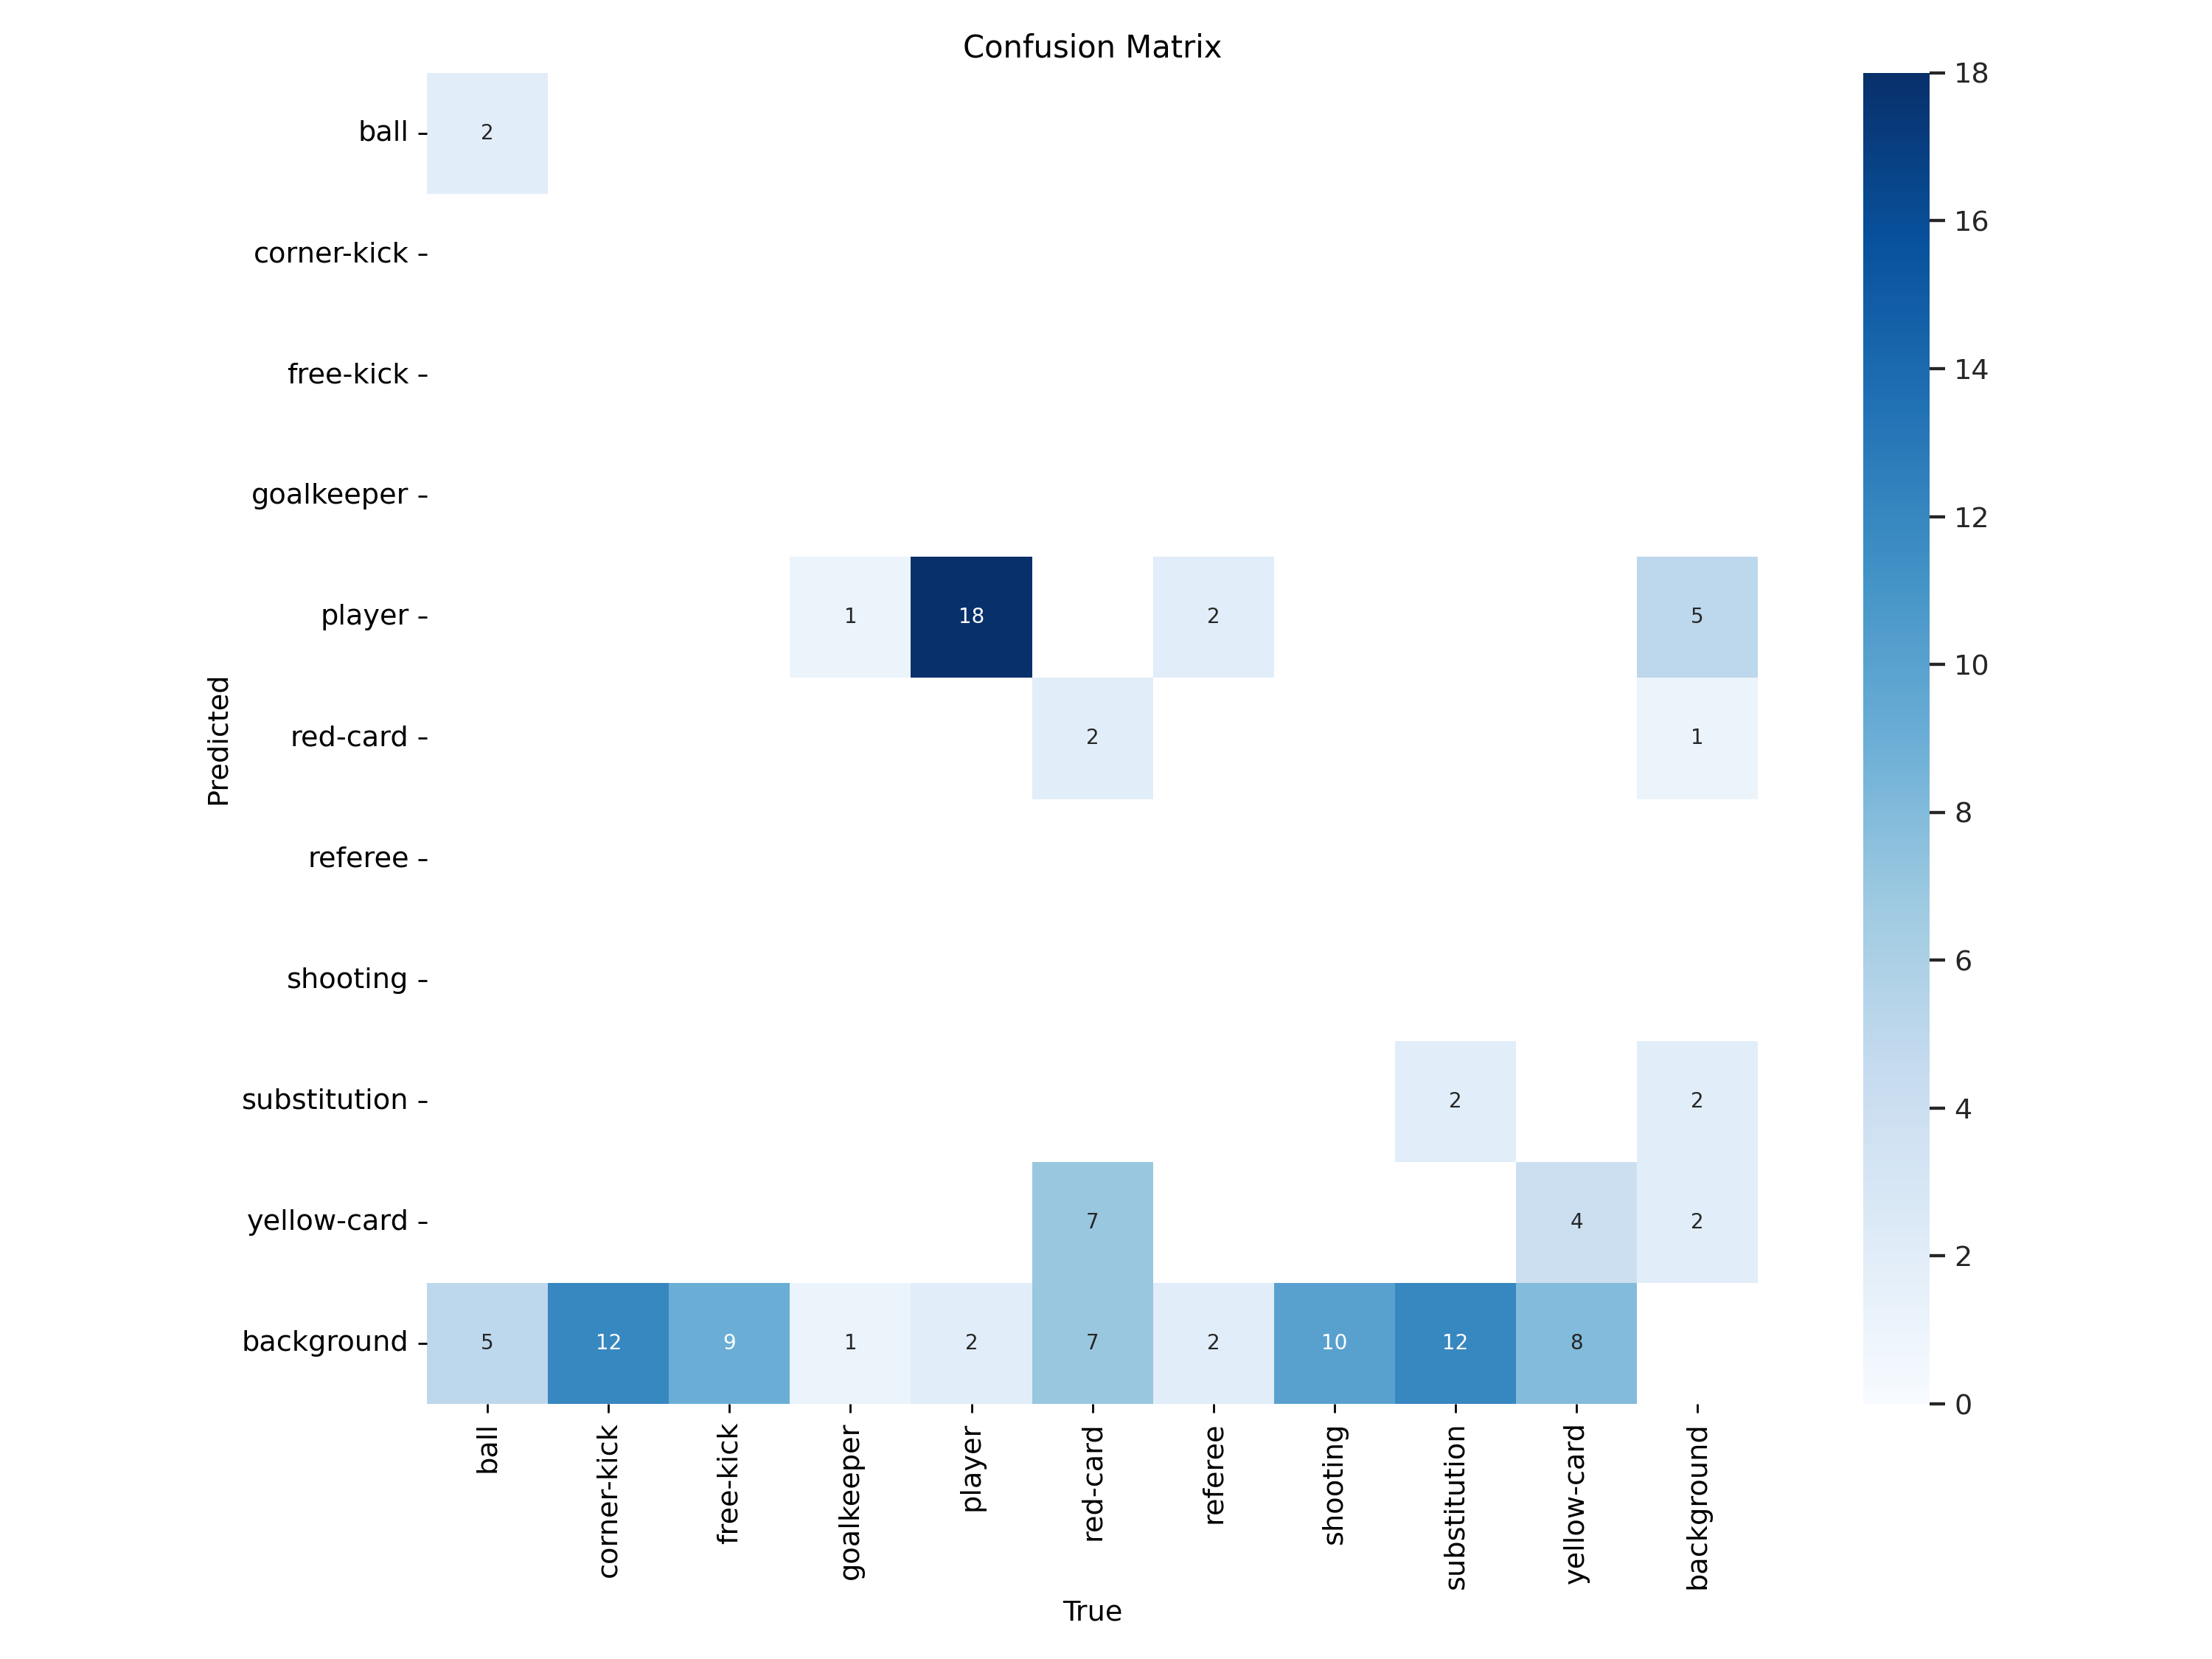

In [4]:
Image(filename='/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/runs/detect/train5/confusion_matrix.png')

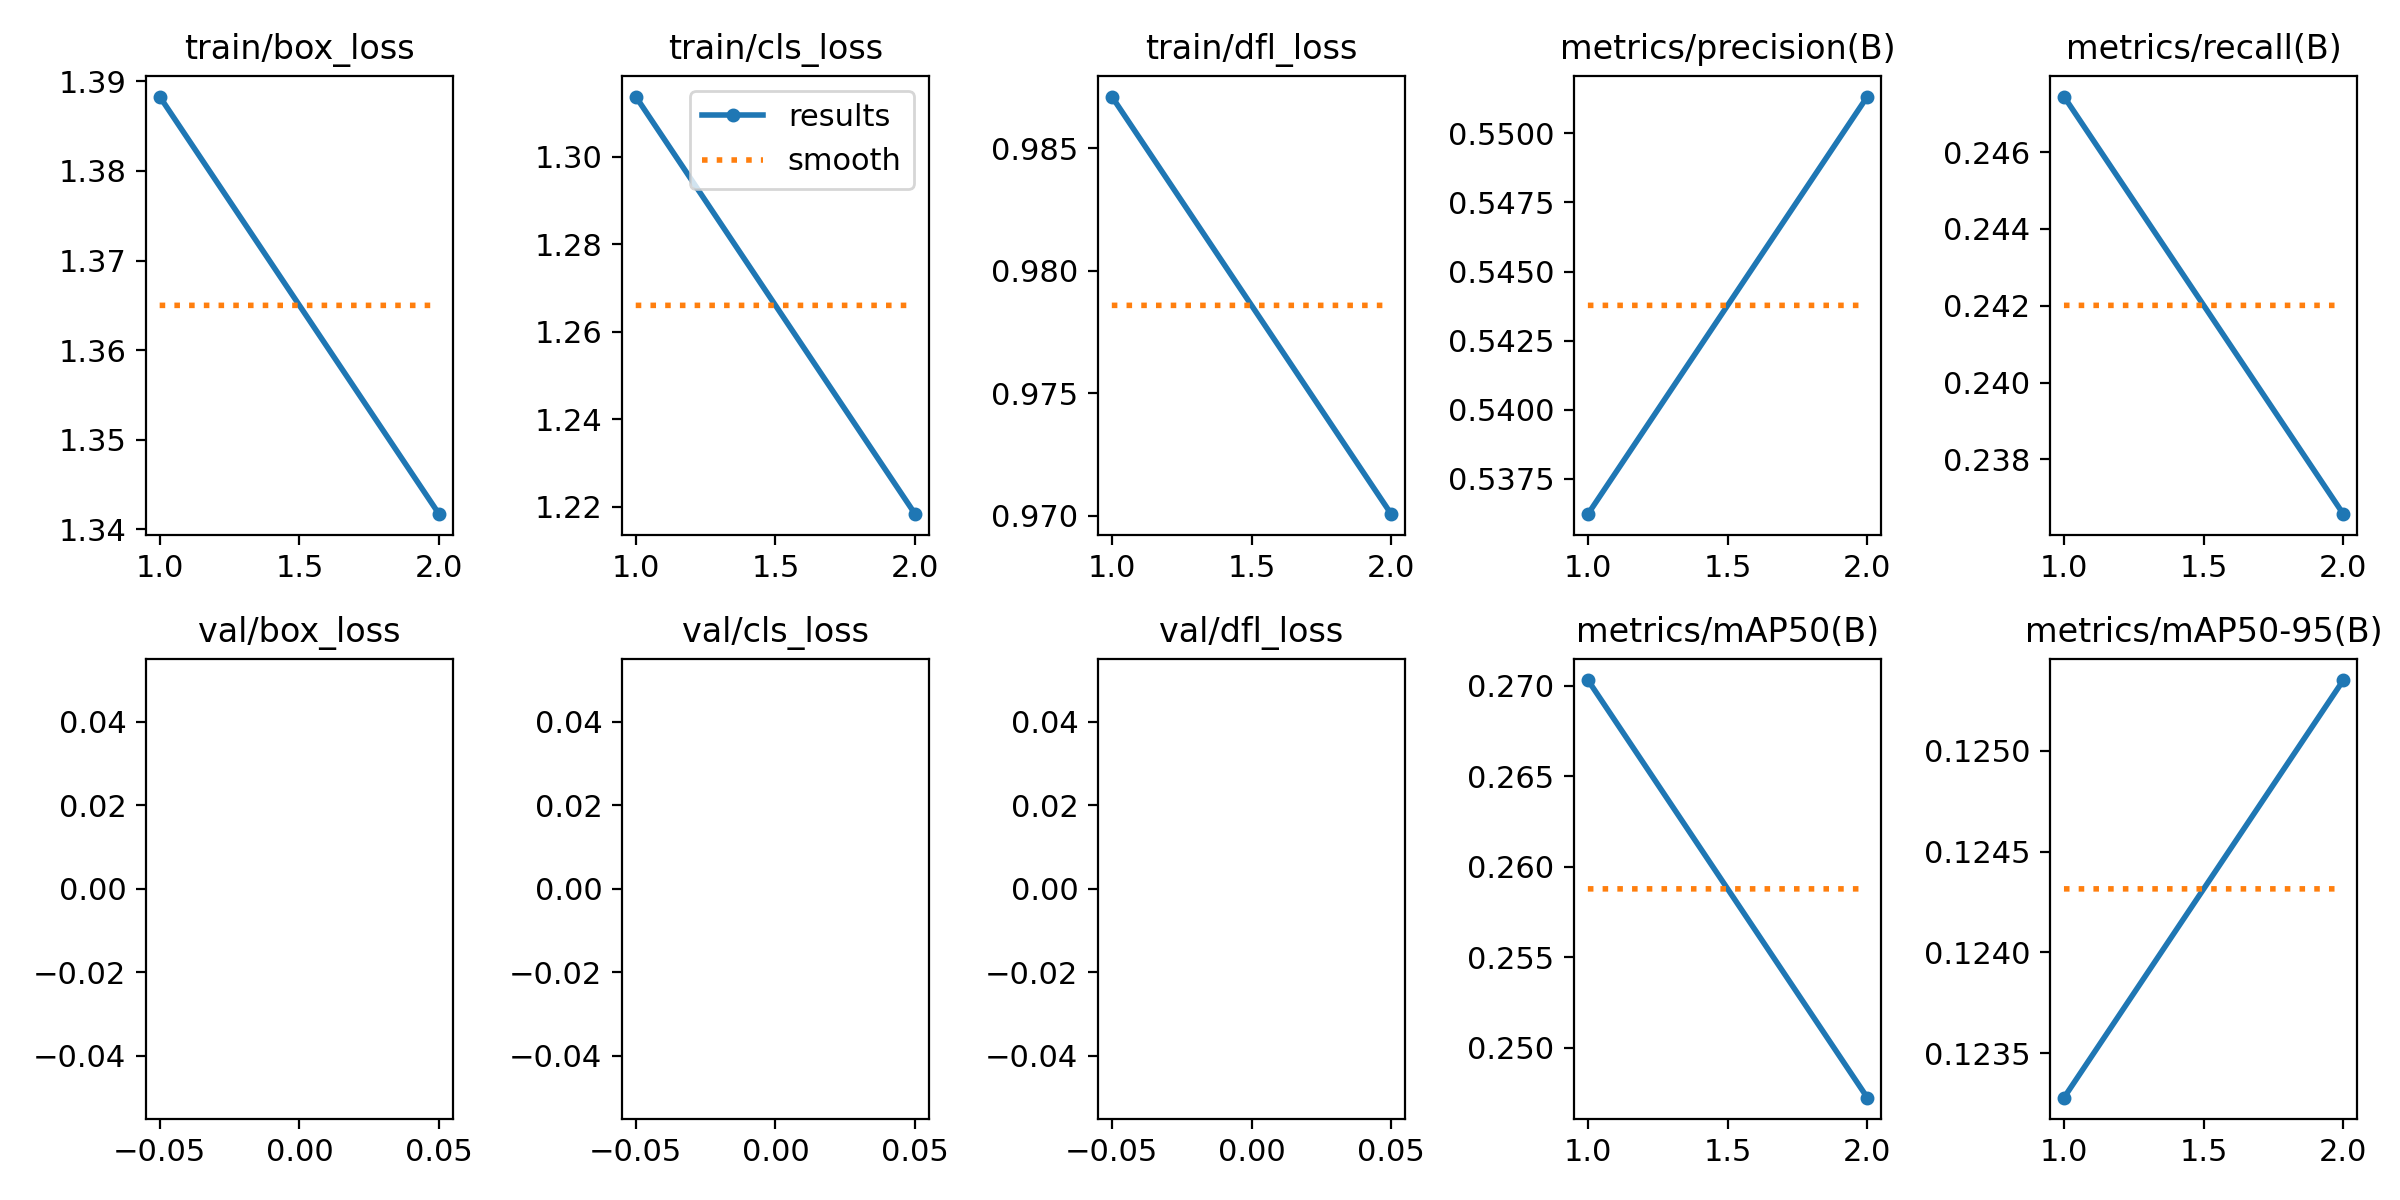

In [7]:
Image(filename='/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/runs/detect/train5/results.png', width=600)

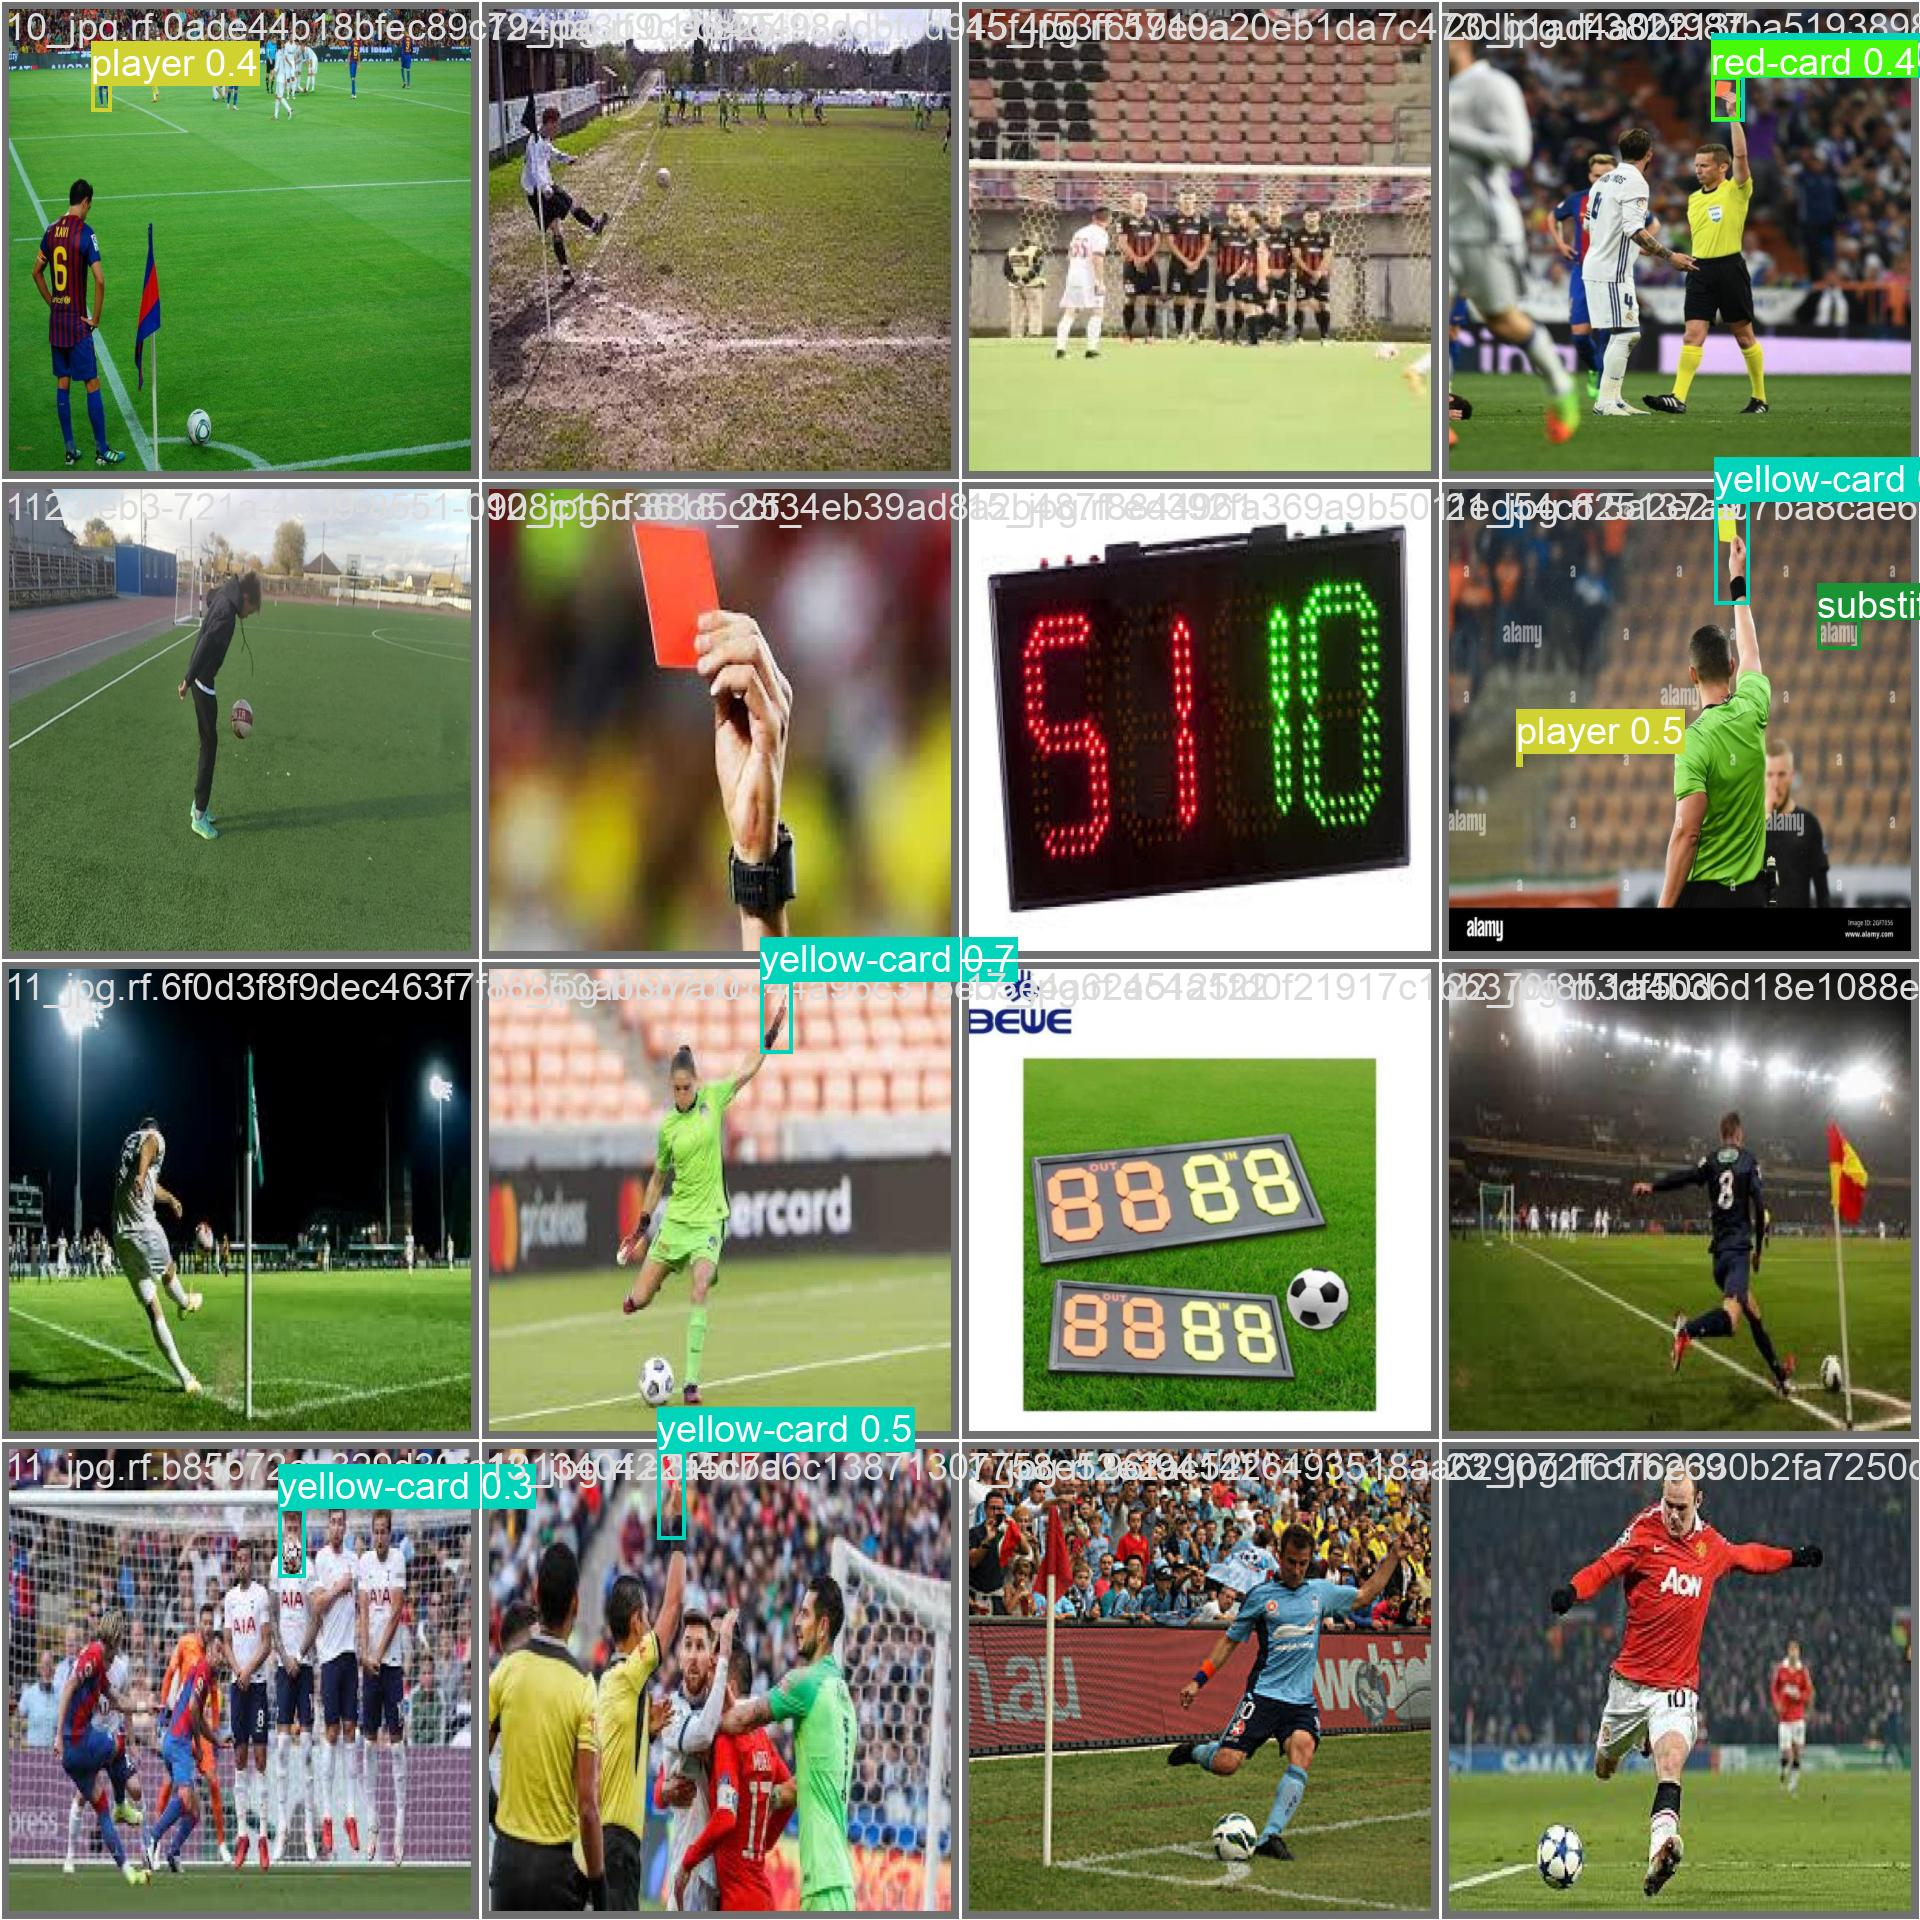

In [8]:
Image(filename='/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/runs/detect/train5/val_batch0_pred.jpg', width=600)


In [39]:
import cv2
from ultralytics import YOLO


In [ ]:
video_path = "/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/dataset/demo.mp4"

In [41]:
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
model = YOLO("/home/urvashi2022/Desktop/UI_DEVELOPMENT/DetectionMoreEvents/runs/detect/train10/weights/best.pt")
frames_to_skip = 20
frame_num = 0

In [42]:
import pandas as pd
df = pd.DataFrame(columns=['Current time', 'Frame number', 'Event type', 'Confidence'])


In [ ]:
class_names = ['ball', 'Corner-kick', 'Free-kick', 'goalkeeper', 'player', 'Red-card', 'Referee', 'Shooting', 'Substitution', 'Yellow-card']
while cap.isOpened():
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    current_time = frame_num // fps # in seconds
    if frame_num % 1000 == 0:
        print("Current time: ", current_time)
        print("Frame number: ", frame_num)  
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    if frame_num % frames_to_skip == 0:
        results = model(frame)
        for result in results:
            boxes = result.boxes
            for box in boxes:
                confidence = box.conf[0].cpu().item()
                class_id = int(box.cls[0].cpu().item())
                if class_id in [1, 2, 5, 7, 8, 9]:
                    print(f"Current time: {current_time}, Frame: {frame_num}, Class: {class_names[class_id]}, Confidence: {confidence}")
                    # add these details to the csv file
                    # Create a new DataFrame from the dictionary to be appended
                    new_row = pd.DataFrame([{'Current time': current_time, 
                                            'Frame number': frame_num, 
                                            'Event type': class_names[class_id], 
                                            'Confidence': confidence}])

                    # Concatenate the new row to the existing DataFrame
                    df = pd.concat([df, new_row], ignore_index=True)
    frame_num += 10

                


0: 384x640 18 players, 3.6ms
Speed: 0.7ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Current time:  0.0
Frame number:  0



0: 384x640 10 players, 6.2ms
Speed: 1.2ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image a

Current time:  40.0
Frame number:  1000



0: 384x640 26 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.0ms
Speed: 0.8ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.6ms postpro

Current time: 60.0, Frame: 1520, Class: Shooting, Confidence: 0.48566848039627075



0: 384x640 16 players, 1 referee, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 3.7ms
Speed: 1.3ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.1ms postprocess per im

Current time:  80.0
Frame number:  2000



0: 384x640 18 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 4.5ms
Speed: 1.2ms preprocess, 4.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 38

Current time:  120.0
Frame number:  3000



0: 384x640 16 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.0ms preprocess, 4.1

Current time:  160.0
Frame number:  4000



0: 384x640 (no detections), 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.8ms
Speed: 1.2ms preprocess, 5.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.5ms postproces

Current time:  200.0
Frame number:  5000



0: 384x640 9 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 7 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per 

Current time: 204.0, Frame: 5120, Class: Corner-kick, Confidence: 0.3392074406147003



0: 384x640 15 players, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 4 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Current time: 210.0, Frame: 5260, Class: Corner-kick, Confidence: 0.3027639091014862



0: 384x640 12 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 6.9ms
Speed: 0.9ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384

Current time: 232.0, Frame: 5800, Class: Shooting, Confidence: 0.26390403509140015



0: 384x640 18 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 8 players, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Current time: 236.0, Frame: 5900, Class: Corner-kick, Confidence: 0.2852191925048828


0: 384x640 11 players, 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 4.3ms
Speed: 1.3ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Current time:  240.0
Frame number:  6000



0: 384x640 17 players, 4.1ms
Speed: 0.9ms preprocess, 4.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384,

Current time:  280.0
Frame number:  7000
Current time: 280.0, Frame: 7000, Class: Substitution, Confidence: 0.593187153339386



0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 5.2ms
Speed: 1.3ms preprocess, 5.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 38

Current time:  320.0
Frame number:  8000



0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms 

Current time: 344.0, Frame: 8620, Class: Shooting, Confidence: 0.8558776378631592



0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image

Current time:  360.0
Frame number:  9000



0: 384x640 10 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 4 players, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Current time: 365.0, Frame: 9140, Class: Corner-kick, Confidence: 0.3641594350337982



0: 384x640 16 players, 1 referee, 5.4ms
Speed: 1.2ms preprocess, 5.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.6ms
Speed: 1.5ms preprocess, 4.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 8.8ms
Speed: 1.3ms preproce

Current time:  400.0
Frame number:  10000



0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms 

Current time: 435.0, Frame: 10880, Class: Shooting, Confidence: 0.8534123301506042



0: 384x640 (no detections), 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4.6ms
Speed: 1.1ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape

Current time:  440.0
Frame number:  11000



0: 384x640 18 players, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 38

Current time:  480.0
Frame number:  12000



0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per imag

Current time:  520.0
Frame number:  13000



0: 384x640 12 players, 1 referee, 3.7ms
Speed: 1.3ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.8ms preprocess, 3.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 0.9ms preprocess,

Current time:  560.0
Frame number:  14000



0: 384x640 (no detections), 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per i

Current time:  600.0
Frame number:  15000



0: 384x640 17 players, 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3,

Current time: 636.0, Frame: 15900, Class: Shooting, Confidence: 0.7416199445724487
Current time: 636.0, Frame: 15900, Class: Shooting, Confidence: 0.31064894795417786



0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Current time:  640.0
Frame number:  16000



0: 384x640 14 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shap

Current time: 661.0, Frame: 16540, Class: Shooting, Confidence: 0.28733476996421814



0: 384x640 (no detections), 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.3ms
Speed: 1.2ms preprocess, 6.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms p

Current time:  680.0
Frame number:  17000



0: 384x640 14 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 4.7ms
Speed: 1.2ms preprocess, 4.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 64

Current time:  720.0
Frame number:  18000



0: 384x640 14 players, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.5ms postprocess p

Current time:  760.0
Frame number:  19000



0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.8ms
Speed: 1.3ms preprocess, 3.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384

Current time:  800.0
Frame number:  20000



0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.3ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 substitution, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postp

Current time: 806.0, Frame: 20160, Class: Substitution, Confidence: 0.8202580809593201



0: 384x640 15 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 5.8ms
Speed: 1.3ms preprocess, 5.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postpr

Current time: 834.0, Frame: 20860, Class: Shooting, Confidence: 0.6060928106307983
Current time: 834.0, Frame: 20860, Class: Shooting, Confidence: 0.302755743265152
Current time: 836.0, Frame: 20900, Class: Yellow-card, Confidence: 0.47655537724494934



0: 384x640 (no detections), 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Current time:  840.0
Frame number:  21000



0: 384x640 (no detections), 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.5ms post

Current time:  880.0
Frame number:  22000



0: 384x640 8 players, 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384,

Current time:  920.0
Frame number:  23000



0: 384x640 6 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 6 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5

Current time:  960.0
Frame number:  24000



0: 384x640 18 players, 4.8ms
Speed: 1.4ms preprocess, 4.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape 

Current time: 967.0, Frame: 24180, Class: Corner-kick, Confidence: 0.42946770787239075
Current time: 968.0, Frame: 24200, Class: Corner-kick, Confidence: 0.5801540017127991
Current time: 968.0, Frame: 24220, Class: Corner-kick, Confidence: 0.3279200494289398



0: 384x640 4 players, 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.3ms preprocess, 4.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (

Current time: 975.0, Frame: 24380, Class: Corner-kick, Confidence: 0.26145124435424805



0: 384x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.3ms
Speed: 1.5ms preprocess, 4.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.6ms postprocess pe

Current time:  1000.0
Frame number:  25000



0: 384x640 21 players, 4.4ms
Speed: 1.1ms preprocess, 4.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.7ms
Speed: 1.0ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 64

Current time:  1040.0
Frame number:  26000



0: 384x640 (no detections), 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms

Current time:  1080.0
Frame number:  27000


0: 384x640 14 players, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 6

Current time:  1120.0
Frame number:  28000



0: 384x640 (no detections), 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.0ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postp

Current time: 1149.0, Frame: 28740, Class: Corner-kick, Confidence: 0.3170275092124939



0: 384x640 11 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at s

Current time:  1160.0
Frame number:  29000



0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 

Current time: 1199.0, Frame: 29980, Class: Substitution, Confidence: 0.44605734944343567
Current time:  1200.0
Frame number:  30000



0: 384x640 (no detections), 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms 

Current time: 1214.0, Frame: 30360, Class: Shooting, Confidence: 0.357065349817276



0: 384x640 (no detections), 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 4.8ms
Speed: 1.0ms preprocess, 4.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.6ms postprocess per imag

Current time:  1240.0
Frame number:  31000



0: 384x640 9 players, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.9ms
Speed: 1.3ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 6.3ms
Speed: 1.2ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 64

Current time:  1280.0
Frame number:  32000



0: 384x640 12 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 5.0ms
Speed: 1.3ms preprocess, 5.0ms inf

Current time:  1320.0
Frame number:  33000



0: 384x640 1 goalkeeper, 14 players, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.3ms postprocess per im

Current time:  1360.0
Frame number:  34000



0: 384x640 16 players, 1 referee, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 4.1ms
Speed: 1.8ms preprocess, 4.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 5.3ms
Speed: 0.9ms preprocess, 5.3ms inference, 0.6ms postprocess per im

Current time:  1400.0
Frame number:  35000



0: 384x640 10 players, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Current time: 1404.0, Frame: 35120, Class: Shooting, Confidence: 0.27513787150382996


0: 384x640 20 players, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4.8ms
Speed: 1.3ms preprocess, 4.8ms inference, 0.5ms postprocess per ima

Current time: 1434.0, Frame: 35860, Class: Corner-kick, Confidence: 0.34384652972221375



0: 384x640 14 players, 4.4ms
Speed: 0.9ms preprocess, 4.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Current time:  1440.0
Frame number:  36000



0: 384x640 5 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 0.6ms postprocess per image at 

Current time: 1448.0, Frame: 36200, Class: Substitution, Confidence: 0.7213724255561829



0: 384x640 17 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 5.2ms
Speed: 1.3ms preprocess, 5.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.1ms postprocess per im

Current time:  1480.0
Frame number:  37000



0: 384x640 13 players, 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape

Current time:  1520.0
Frame number:  38000



0: 384x640 1 substitution, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Current time: 1522.0, Frame: 38060, Class: Substitution, Confidence: 0.4231834411621094



0: 384x640 21 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.5ms p

Current time:  1560.0
Frame number:  39000



0: 384x640 18 players, 4.8ms
Speed: 1.1ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 6.9ms
Speed: 1.1ms preprocess, 6.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per im

Current time:  1600.0
Frame number:  40000



0: 384x640 15 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.7ms
Speed: 1.3ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 0.6ms postprocess per image at sha

Current time:  1640.0
Frame number:  41000



0: 384x640 14 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.9ms
Speed: 1.3ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.6ms
Speed: 1.0ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shap

Current time:  1680.0
Frame number:  42000



0: 384x640 14 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.2ms
Speed: 1.1ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.5ms postprocess per

Current time:  1720.0
Frame number:  43000



0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 4.5ms
Speed: 1.2ms preprocess, 4.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 38

Current time: 1745.0, Frame: 43640, Class: Corner-kick, Confidence: 0.28491872549057007



0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 

Current time:  1760.0
Frame number:  44000



0: 384x640 (no detections), 3.6ms
Speed: 1.8ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 4.2ms
Speed: 1.6ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 4.1ms
Speed: 1.7ms preprocess, 4.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.7ms
Speed: 1.8ms preprocess, 3.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.9ms postprocess per image at shap

Current time:  1800.0
Frame number:  45000



0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 substitution, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms p

Current time: 1808.0, Frame: 45220, Class: Substitution, Confidence: 0.3187093734741211



0: 384x640 17 players, 3 referees, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 3.6ms
Speed: 0.9ms preprocess, 3.6ms 

Current time:  1840.0
Frame number:  46000



0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.4ms
Speed: 0.9ms preprocess, 4.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms 

Current time:  1880.0
Frame number:  47000



0: 384x640 20 players, 4.8ms
Speed: 1.3ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 1 referee, 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.5ms postprocess per image at shape 

Current time:  1920.0
Frame number:  48000



0: 384x640 24 players, 4.3ms
Speed: 1.4ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 4.4ms
Speed: 1.0ms preprocess, 4.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per im

Current time:  1960.0
Frame number:  49000



0: 384x640 9 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 64

Current time: 1986.0, Frame: 49660, Class: Substitution, Confidence: 0.4260181784629822


0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.5ms postprocess per image

Current time:  2000.0
Frame number:  50000



0: 384x640 (no detections), 4.5ms
Speed: 1.1ms preprocess, 4.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.2ms
Speed: 1.3ms preprocess, 5.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.1ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.4ms
Speed: 1.5ms preprocess, 4.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.8ms
Speed: 0.9ms preprocess, 3.8ms inference, 0.3ms 

Current time:  2040.0
Frame number:  51000



0: 384x640 13 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 3

Current time:  2080.0
Frame number:  52000



0: 384x640 17 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess

Current time: 2098.0, Frame: 52460, Class: Shooting, Confidence: 0.4480954706668854
Current time: 2099.0, Frame: 52480, Class: Substitution, Confidence: 0.358043372631073



0: 384x640 (no detections), 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2101.0, Frame: 52540, Class: Shooting, Confidence: 0.7532771229743958
Current time: 2102.0, Frame: 52560, Class: Shooting, Confidence: 0.4306829273700714



0: 384x640 18 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 5.8ms
Speed: 1.2ms preprocess, 5.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3

Current time:  2120.0
Frame number:  53000



0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at 

Current time:  2160.0
Frame number:  54000



0: 384x640 (no detections), 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.0ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 3.9ms
Speed: 1.0ms preprocess, 3.9ms inferenc

Current time:  2200.0
Frame number:  55000



0: 384x640 11 players, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image 

Current time: 2215.0, Frame: 55380, Class: Shooting, Confidence: 0.3007897138595581
Current time: 2216.0, Frame: 55400, Class: Substitution, Confidence: 0.5544564127922058



0: 384x640 (no detections), 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.3ms 

Current time: 2224.0, Frame: 55620, Class: Shooting, Confidence: 0.591738224029541
Current time: 2226.0, Frame: 55660, Class: Yellow-card, Confidence: 0.47941213846206665



0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms 

Current time: 2236.0, Frame: 55920, Class: Shooting, Confidence: 0.2745293974876404
Current time: 2237.0, Frame: 55940, Class: Shooting, Confidence: 0.8123959302902222
Current time: 2238.0, Frame: 55960, Class: Shooting, Confidence: 0.49999797344207764
Current time: 2238.0, Frame: 55960, Class: Shooting, Confidence: 0.37082910537719727



0: 384x640 (no detections), 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.9ms
Speed: 1.3ms preprocess, 3.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Current time:  2240.0
Frame number:  56000
Current time: 2240.0, Frame: 56000, Class: Shooting, Confidence: 0.3619878590106964
Current time: 2240.0, Frame: 56020, Class: Shooting, Confidence: 0.31088995933532715



0: 384x640 1 shooting, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2241.0, Frame: 56040, Class: Shooting, Confidence: 0.3207013010978699
Current time: 2242.0, Frame: 56060, Class: Shooting, Confidence: 0.5229015946388245



0: 384x640 1 shooting, 7.4ms
Speed: 1.1ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Current time: 2243.0, Frame: 56080, Class: Shooting, Confidence: 0.47543585300445557
Current time: 2244.0, Frame: 56100, Class: Shooting, Confidence: 0.3669239580631256


0: 384x640 (no detections), 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2247.0, Frame: 56180, Class: Shooting, Confidence: 0.30849409103393555



0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.4ms
Speed: 1.2ms preprocess, 4.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 1.2ms preprocess, 8.5ms inference, 0.6ms 

Current time: 2261.0, Frame: 56540, Class: Corner-kick, Confidence: 0.28074413537979126



0: 384x640 (no detections), 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.1ms preprocess, 4.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.3ms 

Current time:  2280.0
Frame number:  57000



0: 384x640 (no detections), 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.3ms 

Current time:  2320.0
Frame number:  58000



0: 384x640 6 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 1.3ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.8ms
Speed: 1.2ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.4ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3

Current time:  2360.0
Frame number:  59000



0: 384x640 18 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference,

Current time:  2400.0
Frame number:  60000



0: 384x640 16 players, 1 referee, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 5.5ms
Speed: 1.4ms preprocess, 5.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 0.8ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms

Current time: 2408.0, Frame: 60200, Class: Yellow-card, Confidence: 0.6175245642662048
Current time: 2408.0, Frame: 60220, Class: Yellow-card, Confidence: 0.3860907554626465



0: 384x640 (no detections), 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 substitution, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.4ms
Speed: 1.1ms preprocess, 4.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Current time: 2412.0, Frame: 60320, Class: Substitution, Confidence: 0.7409024834632874


0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 shooting, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2416.0, Frame: 60400, Class: Shooting, Confidence: 0.2819807529449463



0: 384x640 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.8ms
Speed: 1.4ms preprocess, 3.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.4ms 

Current time:  2440.0
Frame number:  61000



0: 384x640 13 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.9ms
Speed: 1.0ms preprocess, 3.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 38

Current time:  2480.0
Frame number:  62000



0: 384x640 13 players, 3.6ms
Speed: 1.1ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 4.3ms
Speed: 1.3ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 38

Current time:  2520.0
Frame number:  63000



0: 384x640 9 players, 4.7ms
Speed: 1.2ms preprocess, 4.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 3.6ms
Speed: 1.4ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 38

Current time:  2560.0
Frame number:  64000



0: 384x640 3 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 corner-kick, 4 players, 3.6ms
Speed: 0.8ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2563.0, Frame: 64080, Class: Corner-kick, Confidence: 0.29566526412963867



0: 384x640 5 players, 3.7ms
Speed: 1.1ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 3.8ms
Speed: 1.1ms preprocess, 3.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 4.3ms
Speed: 1.3ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

Current time:  2600.0
Frame number:  65000



0: 384x640 12 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 4.1ms
Speed: 0.9ms preprocess, 4.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3.5ms
Speed: 1.1ms preprocess, 3.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.3ms
Speed: 0.9ms preprocess, 4.3ms inference, 0.4ms postprocess per imag

Current time:  2640.0
Frame number:  66000



0: 384x640 13 players, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4.1ms
Speed: 1.1ms preprocess, 4.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 0.7ms postprocess per image at shap

Current time: 2659.0, Frame: 66480, Class: Substitution, Confidence: 0.4633103907108307



0: 384x640 (no detections), 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.7ms
Speed: 1.3ms preprocess, 3.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.1ms
Speed: 1.5ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inferenc

Current time: 2673.0, Frame: 66840, Class: Shooting, Confidence: 0.3066185712814331



0: 384x640 (no detections), 3.9ms
Speed: 1.3ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 substitution, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Current time: 2677.0, Frame: 66940, Class: Substitution, Confidence: 0.29805681109428406



0: 384x640 (no detections), 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Current time:  2680.0
Frame number:  67000



0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.5ms
Speed: 1.2ms preprocess, 5.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.9ms
Speed: 1.1ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 1.0ms preprocess, 3.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.6ms
Speed: 0.9ms preprocess, 3.6ms inference, 0.3ms 

Can't receive frame (stream end?). Exiting ...


In [44]:
# 13:54-shooting
# 16:07-corner-kick
# 40:08-yellow-card

In [45]:
#remove repetitive rows in columns current time
df = df.drop_duplicates(subset=['Current time'])
# reindex the dataframe
df = df.reset_index(drop=True)
#convert time from seconds to minutes and seconds
df['Current time'] = df['Current time'].apply(lambda x: f"{int(x//60)}:{int(x%60)}")
df

,Current time,Frame number,Event type,Confidence
0,1:0,1520,Shooting,0.485668
1,3:24,5120,Corner-kick,0.339207
2,3:30,5260,Corner-kick,0.302764
3,3:52,5800,Shooting,0.263904
4,3:56,5900,Corner-kick,0.285219
5,4:40,7000,Substitution,0.593187
6,5:44,8620,Shooting,0.855878
7,6:5,9140,Corner-kick,0.364159
8,7:15,10880,Shooting,0.853412
9,10:36,15900,Shooting,0.741620


In [46]:
print(df)

   Current time Frame number    Event type  Confidence
0           1:0         1520      Shooting    0.485668
1          3:24         5120   Corner-kick    0.339207
2          3:30         5260   Corner-kick    0.302764
3          3:52         5800      Shooting    0.263904
4          3:56         5900   Corner-kick    0.285219
5          4:40         7000  Substitution    0.593187
6          5:44         8620      Shooting    0.855878
7           6:5         9140   Corner-kick    0.364159
8          7:15        10880      Shooting    0.853412
9         10:36        15900      Shooting    0.741620
10         11:1        16540      Shooting    0.287335
11        13:26        20160  Substitution    0.820258
12        13:54        20860      Shooting    0.606093
13        13:56        20900   Yellow-card    0.476555
14         16:7        24180   Corner-kick    0.429468
15         16:8        24200   Corner-kick    0.580154
16        16:15        24380   Corner-kick    0.261451
17        

In [47]:

# count the number of times each event type occurs
event_counts = df['Event type'].value_counts()
event_counts

Event type
Shooting        25
Corner-kick     12
Substitution    12
Yellow-card      3
Name: count, dtype: int64

In [48]:

Cols = ['Action', 'Corner-kick', 'Free-kick', 'Red-card', 'Shooting', 'Substitution', 'Yellow-card']



In [49]:
# make a df with columns ['Action', 'Corner-kick', 'Free-kick', 'Red-card', 'Shooting', 'Substitution', 'Yellow-card'] and fill with 0
# initialize Action column with "Count of Action" string whereas the columns of the other event types with 0
# skip writing index to the csv file
event_type_counts = pd.DataFrame(columns=Cols)
event_type_counts['Action'] = ['Count of Action']
event_type_counts = event_type_counts.fillna(0)
event_type_counts

# count the number of times each event type occurs for each class in the class_names list
for class_name in Cols:
    if class_name != 'Action':
        # find the number if types the event the class_name occurs
        event_counts = df[df['Event type'] == class_name]['Event type'].value_counts()
        # store the frequency in a single variable int type
        if class_name in event_counts:
            event_count = event_counts[class_name]
            # put event_count in the corresponding column of the event_type_counts dataframe
            event_type_counts[class_name] = event_count
            


Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [50]:
# sace df to csv file
event_type_counts.to_csv("event_type_counts.csv")